In [7]:
import sys
sys.path.append(r'.\..')

from functions import Elements,Impurete_Elements,ONO_Elements,Ferrite_Elements,THIELMANN_Elements
from functions import MAYER_Elements,Indicateurs,Impurete,Ferrite,ONO,THIELMANN,MAYER,Quality_ref

from functions import compute_correlation,compute_mean_absolute_correlation,print_correlation_results
from functions import linear_regression_with_predict_intervals
from functions import plot_linear_regression_with_predict_intervals
from functions import  compute_confidence_interval
from functions import remove_outliers,export_outliers_and_cleaned_data,plot_and_save
from functions import fusion_and_clean_excel_files,add_quality,keep_GS_and_add_quality,split_GS

In [8]:
# Chemins des fichiers Excel à fusionner
files_list = [r'..\data\données brut\TRACTION2023.xlsx',
              r'..\data\données brut\TRACTION2024.xlsx']

# choix de la recette
recipe_name = 'GS 400-15'

### Le pre-traitement

In [9]:
# Lancement du pre-traitement
df = fusion_and_clean_excel_files(files_list)
df = keep_GS_and_add_quality(df)

df_nonconforme, df_conforme = split_GS(recipe_name, df)

### Sélection/Classement des 5 indicateurs qualités

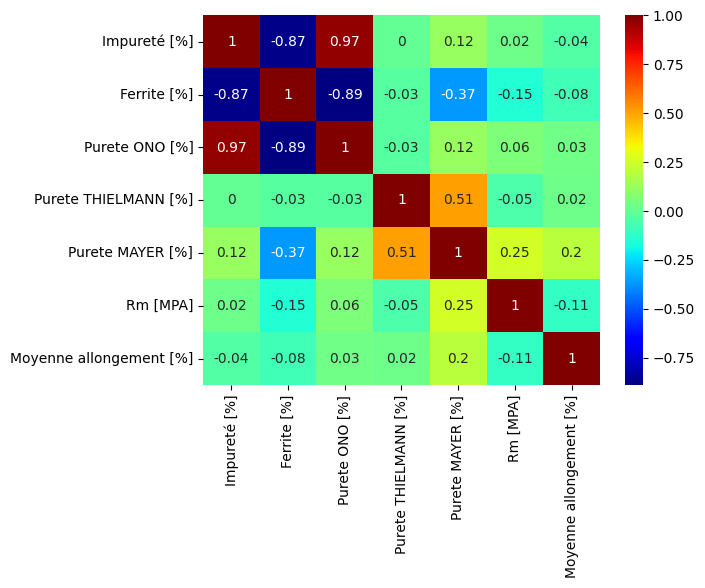

In [10]:
file_name = "Matrice_corrélation_qualite_indicateur.pdf"
corr_matrix = compute_correlation(df_conforme , Indicateurs, Quality_ref,plot=True, file_path =file_name)

In [11]:
corr_matrix_sorted = compute_mean_absolute_correlation(df_conforme, Indicateurs, Quality_ref)
print_correlation_results(Quality_ref, corr_matrix_sorted)

Résultats de la corrélation entre Rm [MPA], Moyenne allongement [%] et les autres variables :
   Purete MAYER [%]: 0.22207958667896574
   Ferrite [%]: 0.11304254081670148
   Purete ONO [%]: 0.042070303570751325
   Purete THIELMANN [%]: 0.034122649869431566
   Impureté [%]: 0.032959386713425874


### Gestions des valeurs extrême

In [12]:
output_dir = r'..\data\données nettoyées'
df_conforme_without_outliers = export_outliers_and_cleaned_data(df_conforme, recipe_name, output_dir)